In [5]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel(r'../数据/预处理后1-390.xlsx')
df

,编号,母亲年龄,婚姻状况,教育程度,妊娠时间（周数）,分娩方式,CBTS,EPDS,HADS,婴儿行为特征,婴儿性别,婴儿年龄（月）,整晚睡眠时间（时：分：秒）,睡醒次数,入睡方式
0,1,34,2,5,37.0,1,3,13,9,0,1,1,10.0,3,2
1,2,33,2,5,42.0,1,0,0,3,1,2,3,11.0,0,4
2,3,37,2,5,41.0,1,4,8,9,1,1,1,12.0,1,2
3,4,31,2,5,37.5,1,6,16,13,1,2,3,11.0,2,1
4,5,36,1,5,40.0,1,1,3,3,0,2,3,10.5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,386,27,2,5,42.0,1,12,20,14,0,1,1,9.0,1,2
385,387,31,2,3,39.0,1,4,7,12,0,1,2,11.0,2,4
386,388,31,2,5,41.6,1,0,3,1,1,1,1,10.5,2,1
387,389,27,2,3,40.0,1,1,10,5,1,1,1,6.0,2,1


In [7]:
def 典型相关分析(X: pd.DataFrame, Y: pd.DataFrame):
    # 将数据集转换为 pandas DataFrame
    X_df = pd.DataFrame(X)
    Y_df = pd.DataFrame(Y)

    # 运行典型相关分析
    cca = CCA(n_components=3)
    cca.fit(X_df, Y_df)
    X_c, Y_c = cca.transform(X_df, Y_df)

    return cca, X_c, Y_c


母亲_身体指标 = df.iloc[:, 1:6]
母亲_心理指标 = df.iloc[:, 6:9]
cca, X_c, Y_c = 典型相关分析(母亲_身体指标, 母亲_心理指标)

cca_corr = np.corrcoef(X_c.T, Y_c.T)
print(cca_corr)

[[ 1.00000000e+00  5.04234981e-17 -1.91676338e-17  2.12454656e-01
   0.00000000e+00 -3.33200571e-17]
 [ 5.04234981e-17  1.00000000e+00  3.06539518e-16 -8.48802825e-05
   1.55871363e-01  3.63649807e-17]
 [-1.91676338e-17  3.06539518e-16  1.00000000e+00 -4.22966985e-09
   9.60200501e-06  6.35619923e-02]
 [ 2.12454656e-01 -8.48802825e-05 -4.22966985e-09  1.00000000e+00
  -3.88799774e-16 -2.11195922e-16]
 [ 0.00000000e+00  1.55871363e-01  9.60200501e-06 -3.88799774e-16
   1.00000000e+00  2.86839809e-16]
 [-3.33200571e-17  3.63649807e-17  6.35619923e-02 -2.11195922e-16
   2.86839809e-16  1.00000000e+00]]


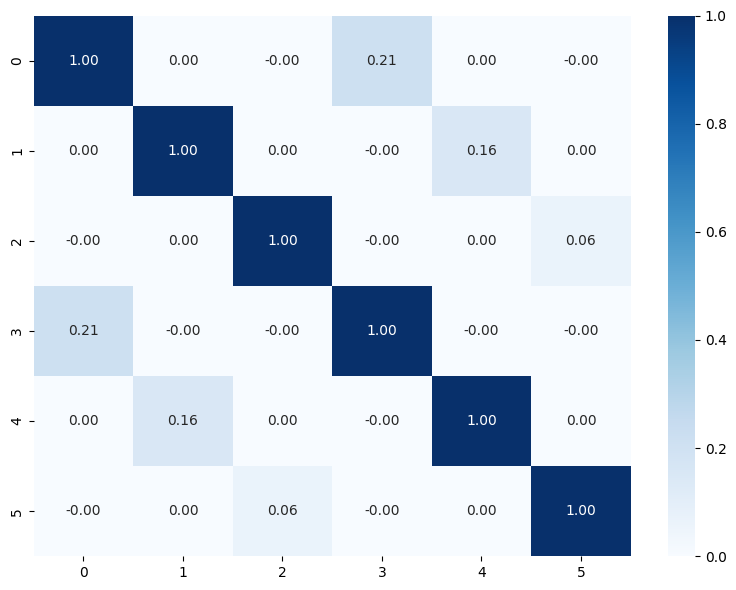

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(cca_corr, cmap='Blues', annot=True, fmt='.2f')
# plt.xticks(rotation=60)
plt.tight_layout()
# convertEMF.exportEmf('.', 'spearman相关系数')
plt.show()